In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from scipy.io import arff
import numpy as np
from ant_cluster import AntCluster
import pylab

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data, meta = arff.loadarff("data/iris.arff")
features = np.array([instance.tolist()[:-1] for instance in data])
labels = [instance[-1] for instance in data]

In [3]:
features.dtype

dtype('float64')

In [4]:
ac = AntCluster(features, label=labels)
runs = len(labels) * 100
ac.similate(runs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [00:02<00:00, 5821.28it/s]


In [5]:
for i, ant_group in enumerate(ac.group()):
    print(f"cluster {i}")
    for ant in ant_group:
        print(ant.gene, ant.true_label)

cluster 0
[6.9 3.1 4.9 1.5] b'Iris-versicolor'
[6.7 3.3 5.7 2.1] b'Iris-virginica'
[5.5 2.3 4.  1.3] b'Iris-versicolor'
[7.2 3.2 6.  1.8] b'Iris-virginica'
[6.5 2.8 4.6 1.5] b'Iris-versicolor'
[6.2 2.8 4.8 1.8] b'Iris-virginica'
[5.7 2.8 4.5 1.3] b'Iris-versicolor'
[6.1 3.  4.9 1.8] b'Iris-virginica'
[6.3 3.3 4.7 1.6] b'Iris-versicolor'
[6.4 2.8 5.6 2.1] b'Iris-virginica'
[4.9 2.4 3.3 1. ] b'Iris-versicolor'
[7.2 3.  5.8 1.6] b'Iris-virginica'
[6.6 2.9 4.6 1.3] b'Iris-versicolor'
[7.4 2.8 6.1 1.9] b'Iris-virginica'
[5.2 2.7 3.9 1.4] b'Iris-versicolor'
[7.9 3.8 6.4 2. ] b'Iris-virginica'
[5.  2.  3.5 1. ] b'Iris-versicolor'
[6.4 2.8 5.6 2.2] b'Iris-virginica'
[5.9 3.  4.2 1.5] b'Iris-versicolor'
[6.3 2.8 5.1 1.5] b'Iris-virginica'
[6.  2.2 4.  1. ] b'Iris-versicolor'
[6.1 2.6 5.6 1.4] b'Iris-virginica'
[6.1 2.9 4.7 1.4] b'Iris-versicolor'
[7.7 3.  6.1 2.3] b'Iris-virginica'
[5.6 2.9 3.6 1.3] b'Iris-versicolor'
[6.3 3.4 5.6 2.4] b'Iris-virginica'
[6.7 3.1 4.4 1.4] b'Iris-versicolor'
[6.4

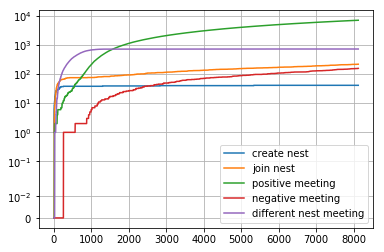

In [26]:
labels = ["create nest", "join nest", "positive meeting", "negative meeting", "different nest meeting"]
trace = np.array(ac.statistic).T
for i in range(trace.shape[0]):
    pylab.plot(trace[i,:].cumsum(), label=labels[i])
    
pylab.yscale('symlog', linthreshy=0.015)
pylab.legend()
pylab.grid()